# Project: Lyrics Classifier

### Goal
* Scrape poems from lyrikline.org and save them on hard drive
* Load poems into corpus
* Create vectors for bag-of-words approach
* Train models on poems
* Predict poet of poem

### To Do
* Make translations work
* Load data from csv (export other part to different file)
* Train models based on different data sets (with and without upsampling)
* Export content to .py file and run from command line

### Import libraries

In [1]:
from bs4 import BeautifulSoup as soup
import os
import spacy

### Load corpus

In [2]:
lang_model = spacy.load('de_core_news_md')

In [3]:
POETS = [
#     "H. C. Artmann",
    "Marcel Beyer",
    "Nico Bleutge",
    "Nora Bossong",
    "Ann Cotten",
    "Paul Celan",
    "Oswald Egger",
    "Durs Grünbein",
#     "Ernst Jandl",
    "Thomas Kling",
    "Friederike  Mayröcker",
    "Marion Poschmann",
    "Monika Rinck",
    "Gerhard Rühm",
    "Ulf Stolterfoht",
    "Peter Waterhouse",
#     "Uljana Wolf",
]


def clean_my_poem(poem, model):
    # parse the song through the spacy model
    tokenised_poem = model(poem)
    clean_poem = ""
    # loop through words, drop stop words
    for word in tokenised_poem:
        if not word.is_stop:
            clean_poem += word.lemma_ + " "
    # return the lemmatized version to the call
    return clean_poem.strip()


def create_poems_corpus(poets):
    """loads song texts from files and stores lyrics and artist index in seperate lists"""
    complete_poems = []
    indices = []
    for i, poet in enumerate(poets):
        directory = f"lyrik/{poet.lower().replace(' ', '_')}" # lyrics ... -lyrics
        allfiles = os.listdir(directory)
        all_poems = []
        for file in allfiles:
            with open(directory + "/" + file, "r", encoding="utf-8") as f:
                poem = f.read()
                all_poems.append(clean_my_poem(poem, lang_model))
                all_poems.append(poem) # save lemmatized and uncleaned version for upsampling
        indices += [i] * len(all_poems)
        print(poet, len(all_poems))
        complete_poems += all_poems
    return complete_poems, indices

In [4]:
# Store lists into variables, print out number of songs by artist
complete_poems, indices = create_poems_corpus(POETS)

Marcel Beyer 20
Nico Bleutge 30
Nora Bossong 20
Ann Cotten 30
Paul Celan 20
Oswald Egger 20
Durs Grünbein 20
Thomas Kling 20
Friederike  Mayröcker 20
Marion Poschmann 30
Monika Rinck 30
Gerhard Rühm 20
Ulf Stolterfoht 30
Peter Waterhouse 20


### Save as csv / Load from csv (optional)

In [31]:
import pandas as pd

df = pd.DataFrame(data=complete_poems, index=indices)
df

,0
0,"Staub , manchmal \n fragen , abends Augenblick..."
0,"Und was ist Staub, will ich dich manchmal\nfra..."
0,"Froschfett , ausgereizt Zustand , Rand auskrat..."
0,"Froschfett, in ausgereiztem Zustand, bis auf d..."
0,"sitzen schauen : Geheimnis . Gegenstand , unge..."
...,...
13,Am Tag des engen Gedankens wechseln wir unauff...
13,"nähern , schön Weise \n entfernen . schönste s..."
13,"Indem wir uns nähern, in der schönsten Weise\n..."
13,Herausfallen ( furchtbar Herausfallen wunderba...


In [6]:
# df.to_csv('poems.csv', sep=';')

In [7]:
# pd.read_csv('poems.csv', sep=';', index_col=0)

### Upsampling through translation 
(gets quickly blocked: JSONDecodeError: Expecting value: line 1 column 1 (char 0))

In [32]:
# from googletrans import Translator


# ko_de_translations = []
# for poem in df[0].values.tolist():
#     translator = Translator()

#     translated_poem = translator.translate(df[0].values.tolist(), dest='ko', src='de')
#     returned_poem = translator.translate(translation.text, dest='de', src='ko')
#     print(returned_poem.text)
#     ko_de_translations.append(returned_poem.text)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### Create vectors

In [9]:
german = ["a","ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","ander","andere","anderem","anderen","anderer","anderes","anderm","andern","anderr","anders","au","auch","auf","aus","ausser","ausserdem","außer","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","d.h","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darum","darunter","darüber","das","dasein","daselbst","dass","dasselbe","davon","davor","dazu","dazwischen","daß","dein","deine","deinem","deinen","deiner","deines","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derer","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","durfte","durften","dürfen","dürft","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einig","einige","einigem","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","euer","eure","eurem","euren","eurer","eures","f","folgende","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","grosse","grossen","grosser","grosses","groß","große","großen","großer","großes","gut","gute","guter","gutes","h","hab","habe","haben","habt","hast","hat","hatte","hatten","hattest","hattet","heisst","her","heute","hier","hin","hinter","hoch","hätte","hätten","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedes","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","keines","kleine","kleinen","kleiner","kleines","kommen","kommt","konnte","konnten","kurz","können","könnt","könnte","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","mal","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","mochten","morgen","muss","musst","musste","mussten","muß","mußt","möchte","mögen","möglich","mögt","müssen","müsst","müßt","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollst","sollt","sollte","sollten","sondern","sonst","soweit","sowie","später","startseite","statt","steht","suche","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","uhr","um","und","uns","unse","unsem","unsen","unser","unsere","unserer","unses","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr","wann","war","waren","warst","wart","warum","was","weg","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","weshalb","wessen","wie","wieder","wieso","will","willst","wir","wird","wirklich","wirst","wissen","wo","woher","wohin","wohl","wollen","wollt","wollte","wollten","worden","wurde","wurden","während","währenddem","währenddessen","wäre","würde","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","über","überhaupt","übrigens"]

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


def vectors_and_df(complete_poems, indices):
    """creates vectors for songs and returns dataframe with songs as word vectors by all artists"""
    cv = TfidfVectorizer(stop_words=german) # use ngram_range argument for word groups 
    cv.fit(complete_poems)
    corpus_vecs = cv.transform(complete_poems)
    return pd.DataFrame(corpus_vecs.todense(), index=indices, columns=cv.get_feature_names()), cv


In [11]:
# Store results into dataframe, keep cv for later prediction
df, cv = vectors_and_df(complete_poems, indices)
df

,10,11,12,1499,20,200,30,3000ern,abblend,abbrechen,...,üblicherweise,übrig,übrigbleiben,übrigblieb,üppig,üppigen,üppiger,все,жиды,поэты
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.058931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.092219,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.086134,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Define features and target column
X = df
y = df.index

### Train test split

In [13]:
# Split the data into train and test set
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

### Train models

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, CategoricalNB

models_params = {
    "MultinomialNB": {"alpha": 0.0001},
    "CategoricalNB": {},
    "RandomForestClassifier": {
        "n_estimators": 500,
        "max_depth": 200,
        "max_features": "auto",
        "n_jobs": -1,
        "random_state": 1,
    },
    "LogisticRegression": {"C": 1e6},
}

def train_models(models_params):
    """trains models on corpus and returns dataframe with scores"""
    scores = {}
    for model in models_params:
        if model == "LogisticRegression":
            m = LogisticRegression(**models_params[model])
        elif model == "RandomForestClassifier":
            m = RandomForestClassifier(**models_params[model])
        elif model == "MultinomialNB":
            m = MultinomialNB(**models_params[model])
        elif model == "CategoricalNB":
            m = MultinomialNB(**models_params[model])

        m.fit(Xtrain, ytrain)
        score_train = m.score(Xtrain, ytrain)
        score_test = m.score(Xtest, ytest)
        scores[f"{model}"] = {
            "params": models_params[model],
            "train score": score_train,
            "test score": score_test,
        }
    return pd.DataFrame(scores).T

In [15]:
df_scores = train_models(models_params)
df_scores

,params,train score,test score
MultinomialNB,{'alpha': 0.0001},1,0.924242
CategoricalNB,{},1,0.893939
RandomForestClassifier,"{'n_estimators': 500, 'max_depth': 200, 'max_f...",1,0.909091
LogisticRegression,{'C': 1000000.0},1,0.893939


### Train on full data set

In [16]:
# Train on most promising model
model = "MultinomialNB"
m = MultinomialNB(**models_params[model])
m.fit(X, y)
m.score(X, y)

1.0

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 0.001, 0.0001]
}

gridcv = GridSearchCV(MultinomialNB(), param_grid, n_jobs=4)
gridcv.fit(X, y)

GridSearchCV(estimator=MultinomialNB(), n_jobs=4,
             param_grid={'alpha': [0.01, 0.1, 0.001, 0.0001]})

In [18]:
results = pd.DataFrame(gridcv.cv_results_)

columns = ['mean_test_score', 'std_test_score', 'mean_fit_time']

results[columns].sort_values('mean_test_score', ascending=False)

,mean_test_score,std_test_score,mean_fit_time
1,0.390909,0.041105,0.092097
3,0.318182,0.033195,0.094236
0,0.242424,0.027104,0.086030
2,0.233333,0.032637,0.096861


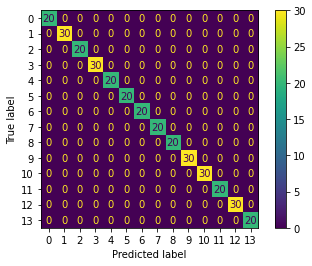

In [19]:
# Plot a confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(m, X, y)

### Predict poet of new input

In [27]:
# Input Goethe's "Osterspaziergang" for prediction
new_poem = [
    """
    Vom Eise befreit sind Strom und Bäche
    Durch des Frühlings holden, belebenden Blick,
    Im Tale grünet Hoffnungsglück;
    Der alte Winter, in seiner Schwäche,
    Zog sich in rauhe Berge zurück.
    Von dort her sendet er, fliehend, nur
    Ohnmächtige Schauer körnigen Eises
    In Streifen über die grünende Flur.
    Aber die Sonne duldet kein Weißes,
    Überall regt sich Bildung und Streben,
    Alles will sie mit Farben beleben;
    Doch an Blumen fehlts im Revier,
    Sie nimmt geputzte Menschen dafür.
    Kehre dich um, von diesen Höhen
    Nach der Stadt zurück zu sehen!
    Aus dem hohlen finstern Tor
    Dringt ein buntes Gewimmel hervor.
    Jeder sonnt sich heute so gern.
    Sie feiern die Auferstehung des Herrn,
    Denn sie sind selber auferstanden:
    Aus niedriger Häuser dumpfen Gemächern,
    Aus Handwerks- und Gewerbesbanden,
    Aus dem Druck von Giebeln und Dächern,
    Aus der Straßen quetschender Enge,
    Aus der Kirchen ehrwürdiger Nacht
    Sind sie alle ans Licht gebracht.
    Sieh nur, sieh! wie behend sich die Menge
    Durch die Gärten und Felder zerschlägt,
    Wie der Fluß in Breit und Länge
    So manchen lustigen Nachen bewegt,
    Und, bis zum Sinken überladen,
    Entfernt sich dieser letzte Kahn.
    Selbst von des Berges fernen Pfaden
    Blinken uns farbige Kleider an.
    Ich höre schon des Dorfs Getümmel,
    Hier ist des Volkes wahrer Himmel,
    Zufrieden jauchzet groß und klein:
    Hier bin ich Mensch, hier darf ichs sein!
    """
]

# Input from Ann Cotten's Fremdwörterbuchsonette
new_poem2 = [
    """
    To beg the question: Deutsch: der Zirkelschluss.Das Ziel ist gleich, das Spiel ist unterschiedlich:Wenn du dich drehst, verlierst du nur den Kopf,Fragebeschwörungen stören das Gegenüber.Kann sein, dass dich das Gegenüber deshalbgerade lieb gewinnt, da es enthobender Pflicht zu antworten. Dir zusehendbrauchts bloß zu stehn und irgendwann zu gehen.Fragt sich da nur, ist das in deinem Sinn?Was nützt das Wohlwollen, wenn dir zu Hausedie Zirkelschlüsse bis zum Halse aufgetürmtnicht mal als Hulareifen taugen, kannst dudoch deine Solipsie nie mehr so fröhlichdurchführen, dass, wie früher, alles zu schweben scheint.Das Gegenüber könnte helfen. Deshalb bauin deine Zirkelschlüsse eine Schlüsselstelle ein.Wie beim Gerät der Clowns und Zauberer kann dannein zweiter Ring gelinde in den deinen schlüpfen,wenn niemand hinsieht. Ja noch vier bis fünf.Es braucht nur diesen Fehler, der dein Wohlwollenwie ein verschärftes Zwinkern – was denn?Beherbergt eine Ritze dein Begehren?
    Machst du die Fehler nur, um korrigiert zu werden?Ist dieser alte Trick nicht bloß unendlich trist?Oh, dein versehrtes Ich denkt gleich an tryst, an trust,Trapeze, Blindflug, und wie dieses Klackern klingt,und will doch nur, dass jemand anders zugibt,dass er getrickst hat, um mit dir zusammenzufallen.
    """
]

In [28]:
def predict_poet(poem, poets):
    """predicts artist of song based on artists in corpus"""
    # transform song into vector matrix
    poem_vecs = cv.transform(poem)
    ynew = poem_vecs.todense()
    
    print(f"This classifier predicts the poem to be written by:\n")
    for i, artist in enumerate(poets):
        print(f"{poets[i]}: {round(m.predict_proba(ynew)[0][i] * 100, 1) }%.")
    poem_pred = m.predict(ynew)[0]
    confidence = m.predict_proba(ynew).max()
    if confidence > 0.9:
        confidence_word = "definitely"
    elif confidence > 0.7:
        confidence_word = "probably"
    else:
        confidence_word = "maybe"
    print(f"\nThis poem is {confidence_word} by {poets[poem_pred]}!")

In [29]:
predict_poet(new_poem2, POETS)

This classifier predicts the poem to be written by:

Marcel Beyer: 0.0%.
Nico Bleutge: 0.0%.
Nora Bossong: 0.0%.
Ann Cotten: 99.9%.
Paul Celan: 0.0%.
Oswald Egger: 0.0%.
Durs Grünbein: 0.0%.
Thomas Kling: 0.0%.
Friederike  Mayröcker: 0.0%.
Marion Poschmann: 0.0%.
Monika Rinck: 0.0%.
Gerhard Rühm: 0.0%.
Ulf Stolterfoht: 0.0%.
Peter Waterhouse: 0.0%.

This poem is definitely by Ann Cotten!
